In [48]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# importing my own libraries

import Dis_Stats as ds
import ConInt_Z_Score as zs
import ConInt_T_Score as ts
import T_stats_hypothisis as thy

In [49]:
# loading dataset and also encoding to avoid version error

df = pd.read_csv(r'D:\Excelr\Data_Science _Course\Code\DATASET\Sample - Superstore.csv' , encoding = 'latin-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [50]:
# to get the information about the dataset like row number , column number , null vales etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [51]:
# to get the statistics values of the operations

df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [52]:
# to get the statistics of any one column

ds.calc_fo(df['Quantity'])

Total Revenue 37873
Total Count 9994
Mean 3.789573744246548
Median 3.0
Mode 3
Minimum 1
Maximum 14
Range 13
Variance 4.95061772905248
Standard Deviation 2.224998366078609
Quartile 1 2.0
Quartile 3 5.0
Inter Quartile Range 3.0
Lower Whisker -2.5
Upper Whisker 9.5
1.2783528478702606
1.9902926633130011


In [53]:
# to get the statistics of any one column

ds.calc_fo(df['Profit'])

Total Revenue 286397.0217
Total Count 9994
Mean 28.65689630778467
Median 8.6665
Mode 0.0
Minimum -6599.978
Maximum 8399.976
Range 14999.954000000002
Variance 54872.306980928704
Standard Deviation 234.2483873603588
Quartile 1 1.72875
Quartile 3 29.364
Inter Quartile Range 27.63525
Lower Whisker -39.724125
Upper Whisker 70.816875
7.560296619477546
396.9892286014973


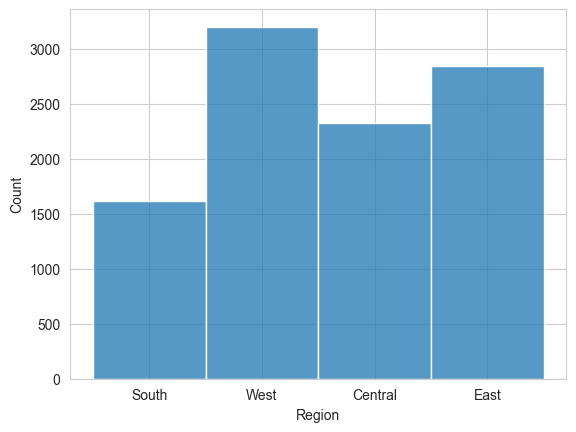

In [54]:
# to visulaize the profit in the form of a histogram using seaborn and matplotlib

sns.histplot(df['Region'])
plt.show()

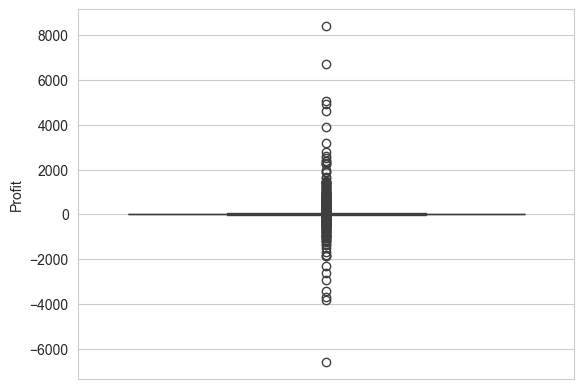

In [55]:
# to visulaize the profit in the form of a boxplot using seaborn and matplotlib

sns.boxplot(df['Profit'])
plt.show()

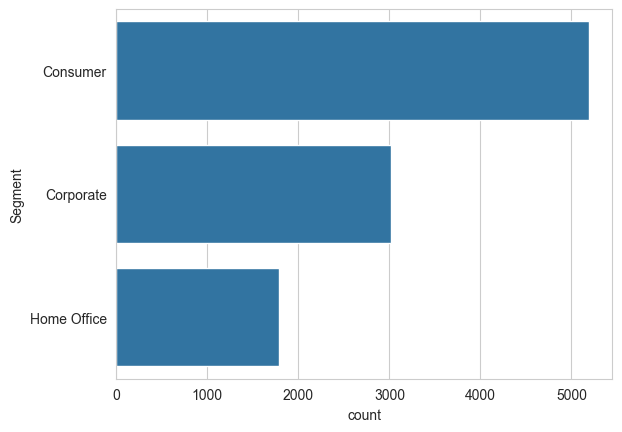

In [56]:
# to visulaize the profit in the form of a countplot using seaborn and matplotlib

sns.countplot(df['Segment'])
plt.show()

In [57]:
# to calculate the correlation of the all numeric data

df.corr(numeric_only=True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


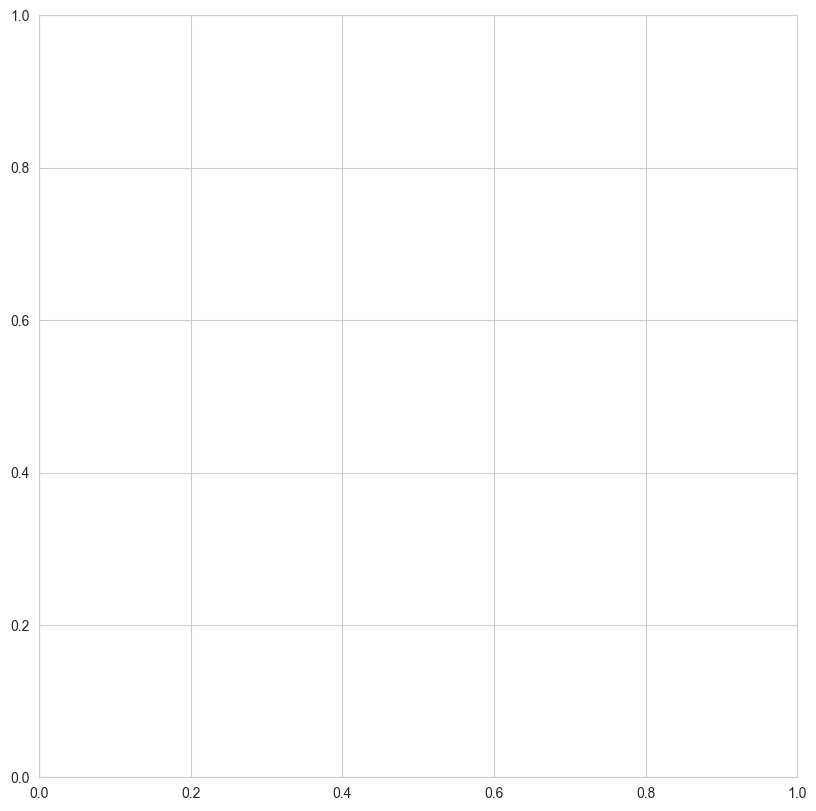

In [58]:
# to get work figure with a specific style 

plt.figure(figsize=(16,40))
sns.set_style('whitegrid')

plt.subplot(5,2,1) # to create a subplot
plt.tight_layout() # to arrange the layout tightly

plt.show()

In [59]:
# to group the cloumn data and get its any stats.

df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [60]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [62]:
# to covert the object data type into date time format

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [64]:
# to get the monthly total sales

monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum() # we use 'ME' instead of 'M' due to it will be removed in future version.
monthly_sales

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

In [65]:
# to get yearly total sales

yearly_sales = df.resample('YE',on='Order Date')['Sales'].sum() # we use 'YE' instead of 'Y' due to it will be removed in future version.
yearly_sales

Order Date
2014-12-31    484247.4981
2015-12-31    470532.5090
2016-12-31    609205.5980
2017-12-31    733215.2552
Freq: YE-DEC, Name: Sales, dtype: float64

In [66]:
# to get the montly total profit

monthly_profit = df.resample('ME',on='Order Date')['Profit'].sum()
monthly_profit

Order Date
2014-01-31     2450.1907
2014-02-28      862.3084
2014-03-31      498.7299
2014-04-30     3488.8352
2014-05-31     2738.7096
2014-06-30     4976.5244
2014-07-31     -841.4826
2014-08-31     5318.1050
2014-09-30     8328.0994
2014-10-31     3448.2573
2014-11-30     9292.1269
2014-12-31     8983.5699
2015-01-31    -3281.0070
2015-02-28     2813.8508
2015-03-31     9732.0978
2015-04-30     4187.4962
2015-05-31     4667.8690
2015-06-30     3335.5572
2015-07-31     3288.6483
2015-08-31     5355.8084
2015-09-30     8209.1627
2015-10-31     2817.3660
2015-11-30    12474.7884
2015-12-31     8016.9659
2016-01-31     2824.8233
2016-02-29     5004.5795
2016-03-31     3611.9680
2016-04-30     2977.8149
2016-05-31     8662.1464
2016-06-30     4750.3781
2016-07-31     4432.8779
2016-08-31     2062.0693
2016-09-30     9328.6576
2016-10-31    16243.1425
2016-11-30     4011.4075
2016-12-31    17885.3093
2017-01-31     7140.4391
2017-02-28     1613.8720
2017-03-31    14751.8915
2017-04-30    

In [67]:
# to get yearly profit

yearly_profit = df.resample('YE',on='Order Date')['Profit'].sum()
yearly_profit

Order Date
2014-12-31    49543.9741
2015-12-31    61618.6037
2016-12-31    81795.1743
2017-12-31    93439.2696
Freq: YE-DEC, Name: Profit, dtype: float64

In [68]:
df['Sales']<250

0       False
1       False
2        True
3       False
4        True
        ...  
9989     True
9990     True
9991    False
9992     True
9993     True
Name: Sales, Length: 9994, dtype: bool

In [69]:
df[df['Sales']<250]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [70]:
df['Region'][df['Sales']<250]

2        West
4       South
5        West
6        West
8        West
        ...  
9988    South
9989    South
9990     West
9992     West
9993     West
Name: Region, Length: 7798, dtype: object

In [71]:
df['Sales'][df['Sales']<250]

2        14.620
4        22.368
5        48.860
6         7.280
8        18.504
         ...   
9988    206.100
9989     25.248
9990     91.960
9992     29.600
9993    243.160
Name: Sales, Length: 7798, dtype: float64

In [72]:
df[['Region','Category']][df['Sales']<250]

,Region,Category
2,West,Office Supplies
4,South,Office Supplies
5,West,Furniture
6,West,Office Supplies
8,West,Office Supplies
...,...,...
9988,South,Technology
9989,South,Furniture
9990,West,Furniture
9992,West,Office Supplies


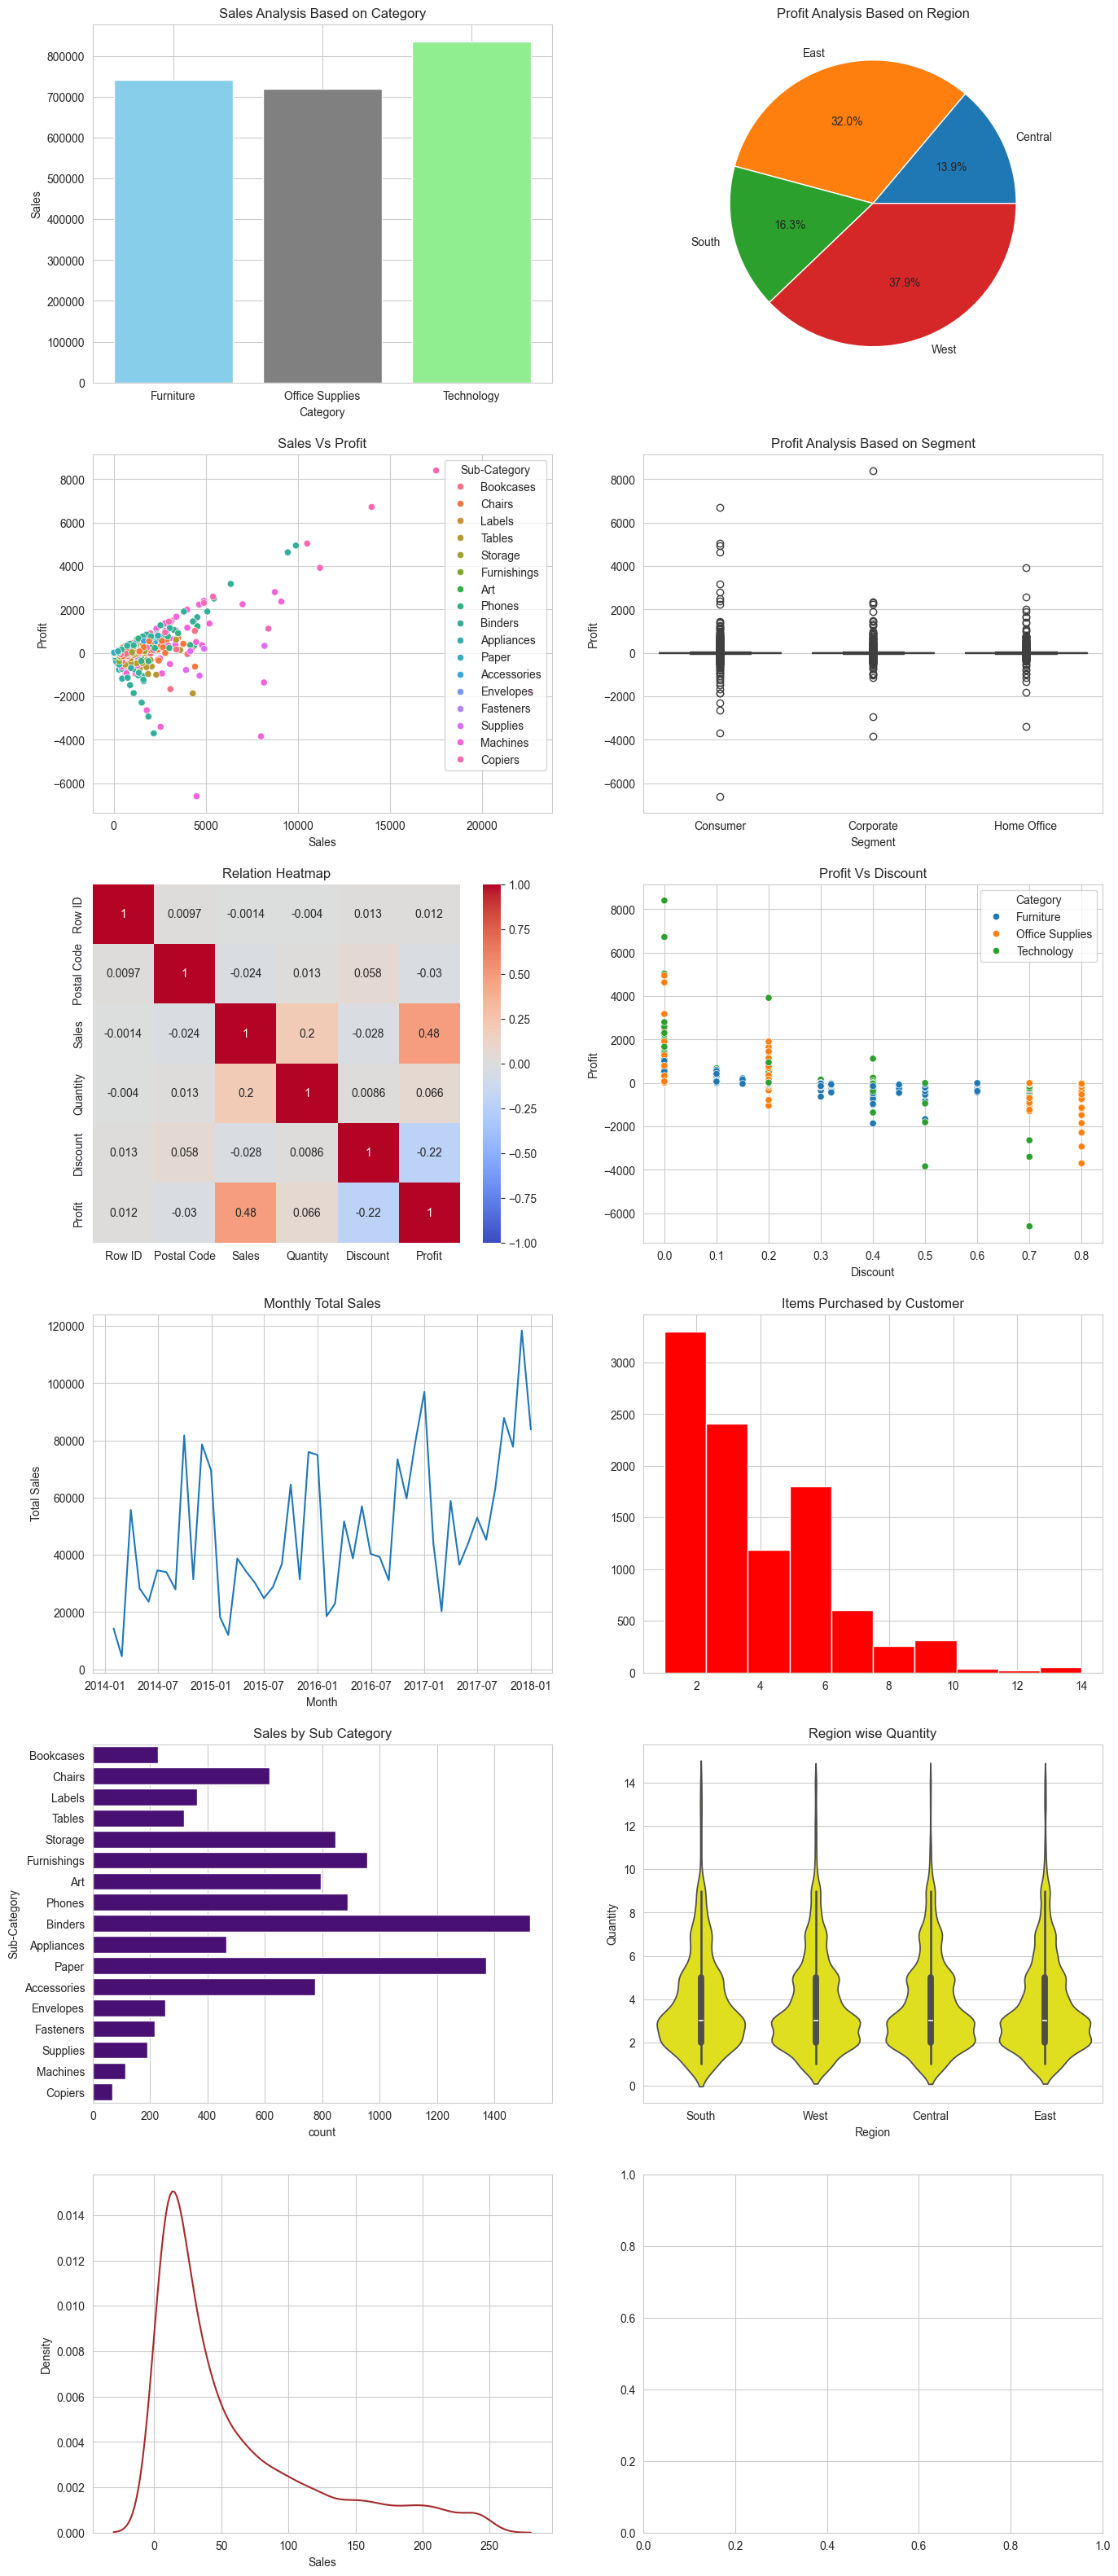

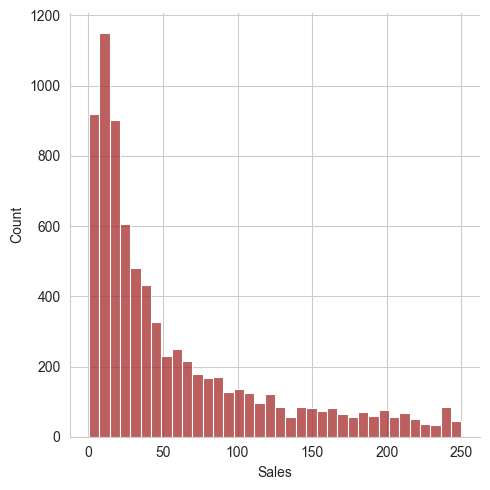

In [73]:
# to create a space with grid and create subplots with charts in it

plt.figure(figsize=(16,40))
sns.set_style('whitegrid')

# to create a barchart

plt.subplot(6,2,1)
bar_color = ['skyblue','grey','lightgreen']
Sales_analysis = df.groupby('Category')['Sales'].sum()
plt.bar(Sales_analysis.index,Sales_analysis.values,color=bar_color) # to make it in horizontal just add h with bar ==> (barh)
plt.title('Sales Analysis Based on Category')
plt.xlabel('Category')
plt.ylabel('Sales')

# to create a piechart

plt.subplot(6,2,2)
profit_anlaysis = df.groupby('Region')['Profit'].sum()
plt.pie(profit_anlaysis.values,labels=profit_anlaysis.index,autopct="%0.1f%%")
plt.title('Profit Analysis Based on Region')

# to create a scatterplot

plt.subplot(6,2,3)
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Sub-Category')
plt.title('Sales Vs Profit')

# to create a boxplot

plt.subplot(6,2,4)
sns.boxplot(data=df,x='Segment',y='Profit')
plt.title('Profit Analysis Based on Segment')

# to create a heatmap

plt.subplot(6,2,5)
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.title('Relation Heatmap')

# to create a scatterplot

plt.subplot(6,2,6)
sns.scatterplot(data=df,x='Discount',y='Profit',hue='Category')
plt.title('Profit Vs Discount')

# to create a line plot

plt.subplot(6,2,7)
monthly_profit = df.resample('ME',on='Order Date')['Sales'].sum()
plt.plot(monthly_profit.index,monthly_profit.values)
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# to create a histogram

plt.subplot(6,2,8)
plt.hist(df['Quantity'],bins=10,color='red')
plt.title('Items Purchased by Customer')

# to create a countplot

plt.subplot(6,2,9)
sns.countplot(df['Sub-Category'],color='indigo')
plt.title('Sales by Sub Category')

# to create a violin plot

plt.subplot(6,2,10)
sns.violinplot(data=df,x='Region',y='Quantity',color='yellow')
plt.title('Region wise Quantity')

# to create a distribution plot

plt.subplot(6,2,11)
sns.kdeplot(df['Sales'][df['Sales']<250],color='brown')

# to create a kdeplot

plt.subplot(6,2,12)
sns.displot(df['Sales'][df['Sales']<250],color='brown')

plt.tight_layout()
plt.show()

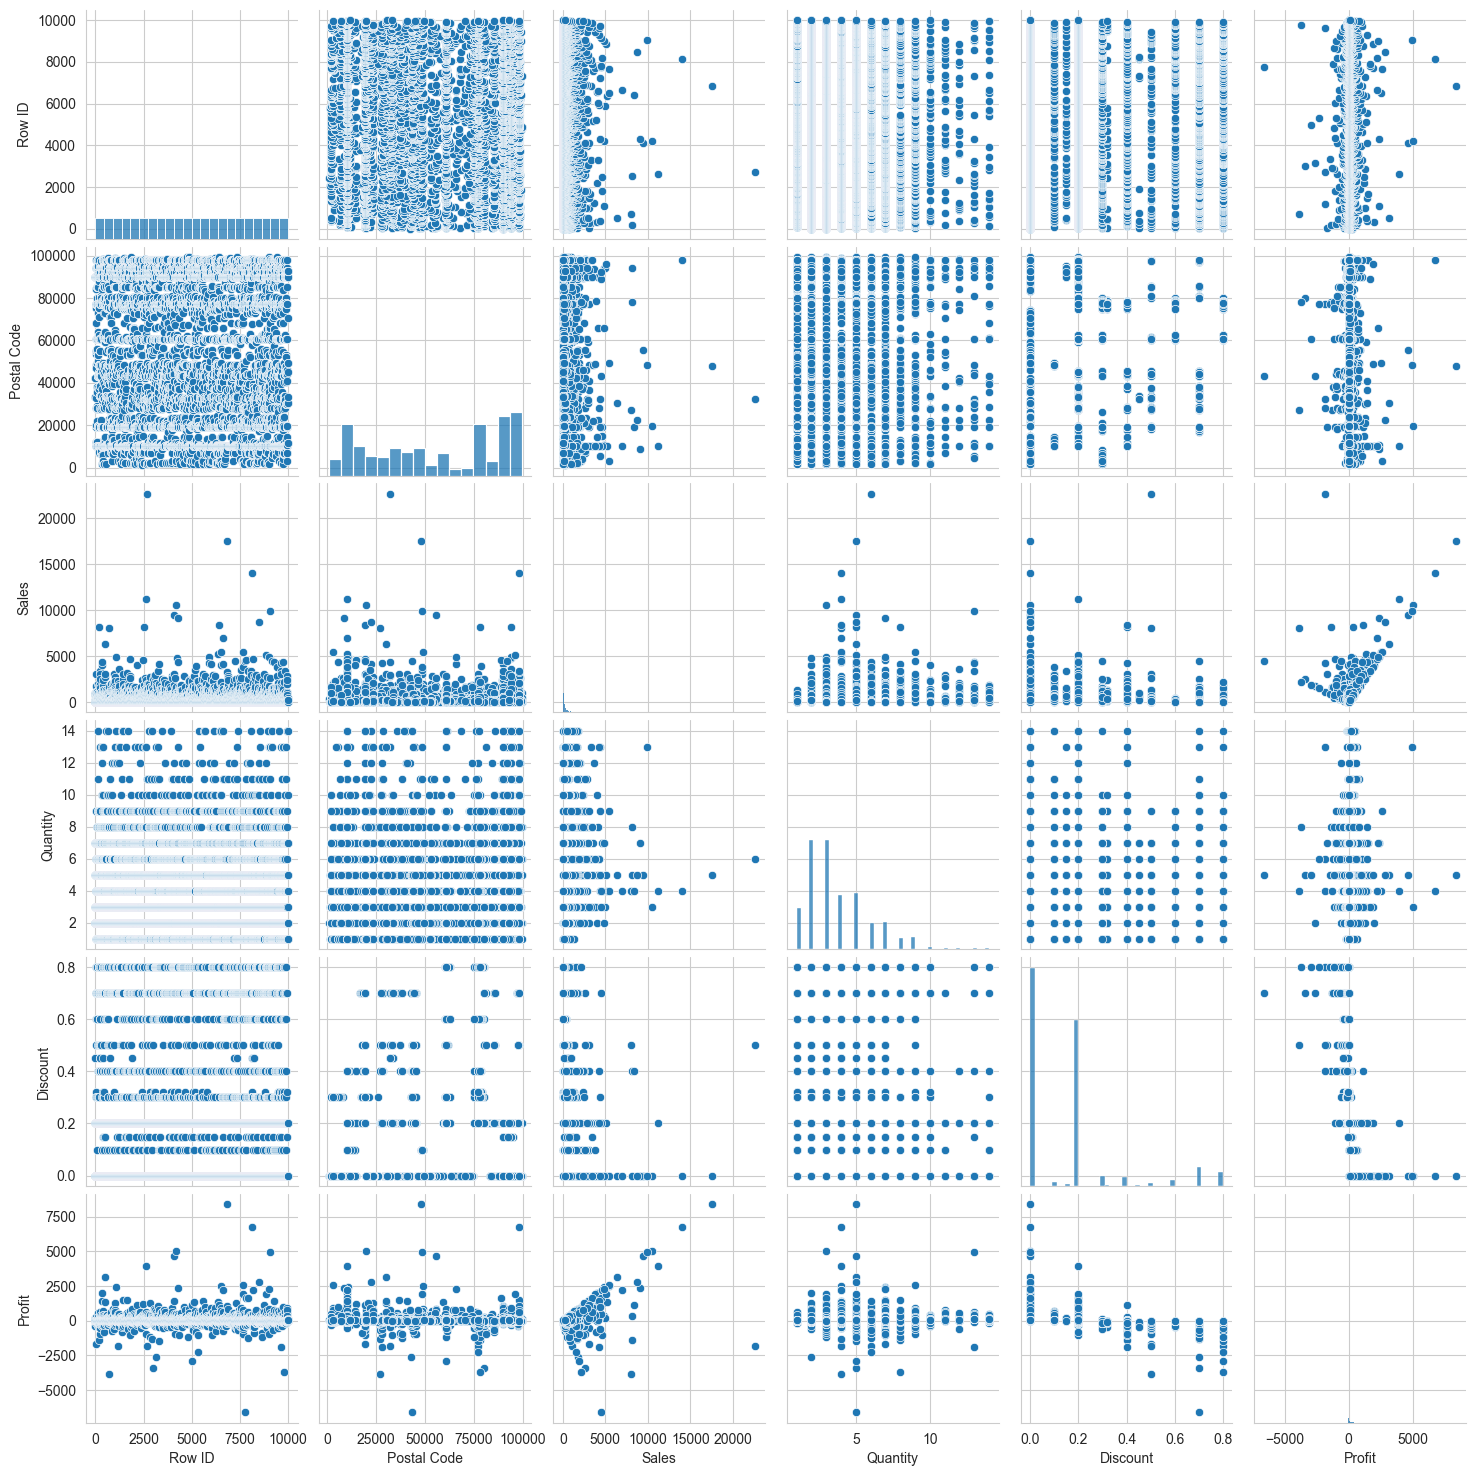

In [74]:
# to get a pairplot of the full dataframe

sns.pairplot(df)
plt.show()

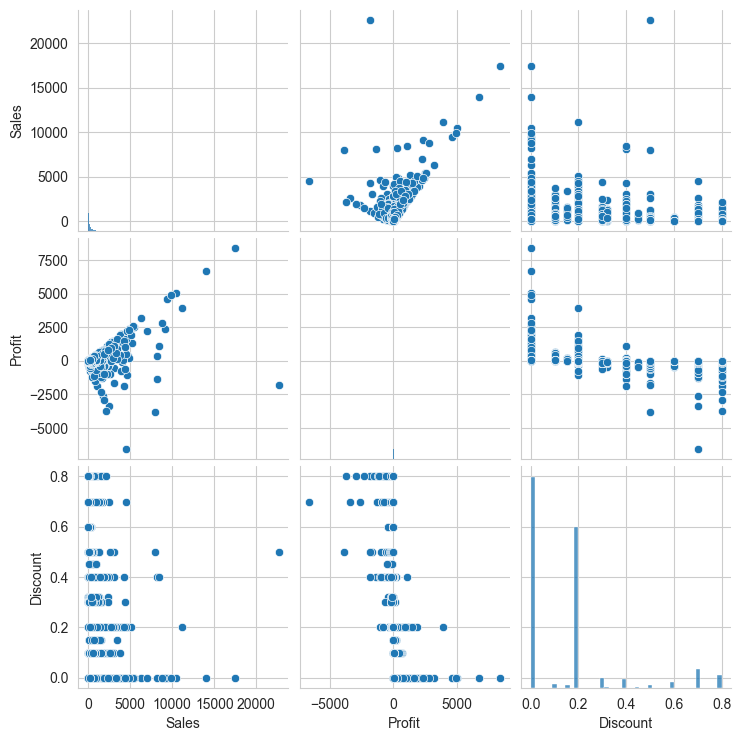

In [75]:
# to get pairplot of dataframe with specified data only

sns.pairplot(df[['Sales','Profit','Discount']])
plt.show()

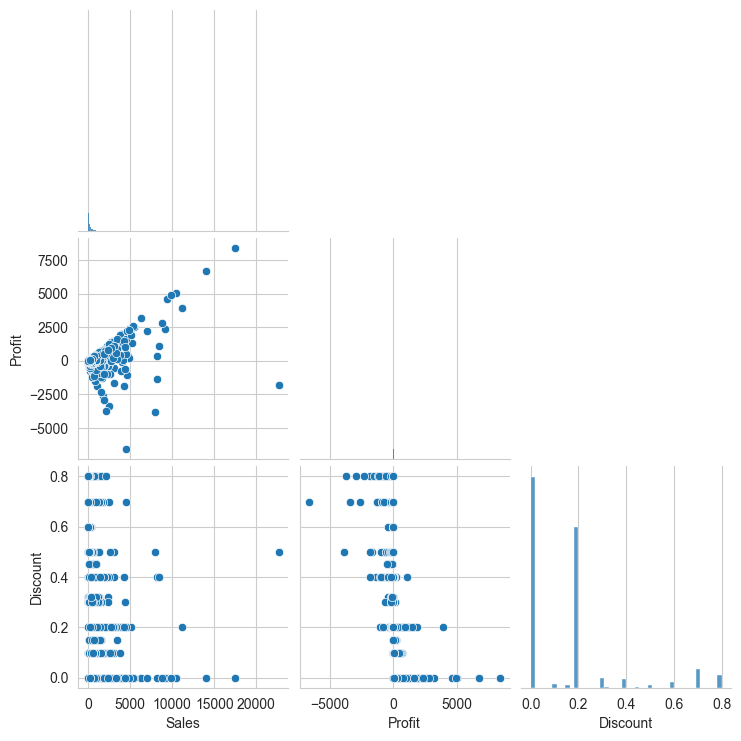

In [76]:
sns.pairplot(df[['Sales','Profit','Discount']],corner=True)
plt.show()

In [77]:
# to get the 80% confidence interval of profit data using z-score

zs.con_intervel(df['Profit'],0.80)

80% confidence interval(25.65, 31.66)


In [78]:
# to get the 90% confidence interval of profit data using z-score

zs.con_intervel(df['Profit'],0.90)

90% confidence interval(24.8, 32.51)


In [79]:
# to get the 95% confidence interval of profit data using z-score

zs.con_intervel(df['Profit'],0.95)

95% confidence interval(24.06, 33.25)


In [80]:
# to get the 99% confidence interval of profit data using z-score

zs.con_intervel(df['Profit'],0.99)

# so this means the avg profit lays b/w these values

99% confidence interval(22.62, 34.69)


In [81]:
# to get the 100% confidence interval of profit data using z-score

zs.con_intervel(df['Profit'],1)

100% confidence interval(-inf, inf)


In [82]:
# to create a new column to find profitable and not

df['Profitable']=np.where(df['Profit'] > 0,1,0)
df['Profitable']

0       1
1       1
2       1
3       0
4       1
       ..
9989    1
9990    1
9991    1
9992    1
9993    1
Name: Profitable, Length: 9994, dtype: int64

In [83]:
# to get the mean of new column

p_success=float(df['Profitable'].mean())
p_success

0.8062837702621573

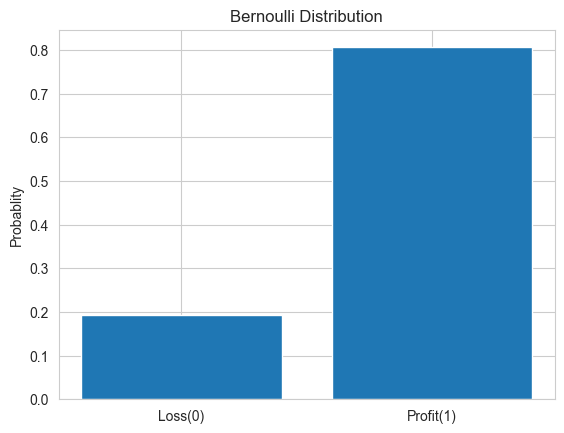

In [84]:
# to get bernoulli distribution with calculated probablity

bernoulli_prob=st.bernoulli(p_success)
bernoulli_prob

# to create a bar plot

x=[0,1]
y=bernoulli_prob.pmf(x)

plt.bar(x,y)
plt.xticks([0,1],['Loss(0)','Profit(1)'])
plt.title('Bernoulli Distribution')
plt.ylabel('Probablity')
plt.show()

In [85]:
# to check the probablity in values to compare with the chart

(df['Profitable'].value_counts()/len(df['Profitable']))*100

Profitable
1    80.628377
0    19.371623
Name: count, dtype: float64

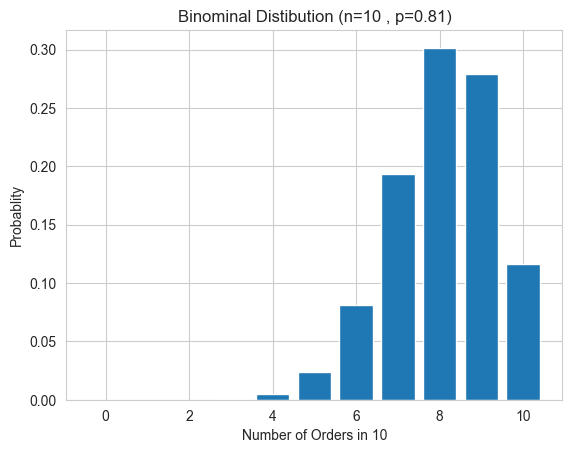

In [86]:
# to get binominal distribution for multiple items

n=10
bernom_probb=st.binom(n,p_success)

x=np.arange(0,n+1)
y=bernom_probb.pmf(x)
plt.bar(x,y)
plt.title(f'Binominal Distibution (n={n} , p={p_success:.2f})')
plt.xlabel('Number of Orders in 10')
plt.ylabel('Probablity')
plt.show()

## Qns?

Objective: Find out if the type of customer (Segment) is associated with their shipping preference (Ship Mode).

Problem Statement:
Superstore wants to know if certain customer segments prefer specific shipping methods. Understanding this can help optimize delivery strategies.

Hypotheses:
Null Hypothesis (H₀): There is no relationship between customer segment and shipping mode. They are independent.

Alternative Hypothesis (H₁): There is a relationship between customer segment and shipping mode. They are dependent.

Why use this?
We are comparing two categorical variables: Segment and Ship Mode.

The Chi-Square test helps us determine if the observed frequencies differ significantly from the expected frequencies.
    

In [87]:
# to create a contingency table for segment & ship mode

contingency=pd.crosstab(df['Segment'],df['Ship Mode'])
contingency

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,769,317,1020,3085
Corporate,485,114,609,1812
Home Office,284,112,316,1071


In [88]:
# to get the values for ch-square stats,p-value,degree of freedom,excepted

chi2_stats,p_value,dof,excepted = st.chi2_contingency(contingency)

print('Chi-Square Statistics : ',round(chi2_stats,4))
print('P-Value : ',round(p_value,4))
print('Degree of Freedom : ',dof)

# to check is it accept H0 or Reject H0 , based on the p_value

alpha=0.05

if p_value < alpha:
    print('Conclusion : Reject H0 , There is a relationship between customer segment and shipping mode. They are dependent.')
else:
    print('Conclusion : Fail to Reject H0 , There is no relationship between customer segment and shipping mode. They are independent.')

Chi-Square Statistics :  28.0979
P-Value :  0.0001
Degree of Freedom :  6
Conclusion : Reject H0 , There is a relationship between customer segment and shipping mode. They are dependent.


In [89]:
por_data = df[df['Category']=='Technology']['Sales']
por_data

7        907.152
11       911.424
19       213.480
26        90.570
35      1097.544
          ...   
9983      97.980
9986      36.240
9987      79.990
9988     206.100
9991     258.576
Name: Sales, Length: 1847, dtype: float64

In [90]:
# to get the 90% confidence interval of Sales data of technology using z-score

ts.t_test(por_data,0.90)

The 90.0% confidence intervel of sales in Technolgy is (410.26, 495.16)


In [91]:
# to get the 99% confidence interval of Sales data of technology using z-score

ts.t_test(por_data,0.99)

The 99.0% confidence intervel of sales in Technolgy is (386.19, 519.23)


## Qns?

Normal Hypothesis Testing: Is the Average Profit Different Across Categories?

Objective: Test if the average profit across categories (like Furniture, Office Supplies, and Technology) is significantly different from a hypothesized value.

Problem Statement:
Superstore wants to test whether the average profit in the Furniture category differs significantly from $300.

Hypotheses:
Null Hypothesis (H₀): The average profit for Furniture is $300.

Alternative Hypothesis (H₁): The average profit for Furniture is not $300.

Why use this?
We're testing a population mean using the Z-test or T-test, based on whether we know the population standard deviation.

Here, we can use the T-test because we don’t know the population’s standard deviation.

In [92]:
rob_data = df[df['Category']=='Furniture']['Profit']
rob_data

0        41.9136
1       219.5820
3      -383.0310
5        14.1694
10       85.3092
          ...   
9962    -67.6704
9964      6.4320
9980     22.3548
9989      4.1028
9990     15.6332
Name: Profit, Length: 2121, dtype: float64

In [93]:
# to calculate t statistics and answer the above question / problem

thy.t_stats_hypo(rob_data,300)

T-Statistics :  -98.6321
P-Value :  0.0
Reject H0 : The average profit for Furniture is not $300.


In [94]:
# testing with different value

thy.t_stats_hypo(rob_data,450)

T-Statistics :  -149.4208
P-Value :  0.0
Reject H0 : The average profit for Furniture is not $300.
